In [80]:
import numpy as np
import pandas as pd
import math
import csv
from scipy.sparse.linalg import svds

In [2]:
with open('new_words.csv') as file:
    reader = csv.reader(file)
    tokens = [[(element) for element in row] for row in reader ]

In [53]:
with open('embed.csv') as file:
    reader = csv.reader(file)
    matrix = [[float(element) for element in row] for row in reader ]
matrix=np.array(matrix)

In [4]:
'''
def freq(word,tokens):
  c=0
  s=word
  for i in range(len(tokens)):
    if tokens[i]==[s]:c+=1
  return c
freq("tokyo",tokens)
  '''

In [54]:
with open('new_words.csv') as file:
    reader = csv.reader(file)
    vocab = [[(element) for element in row] for row in reader ]
!pip install ordered-set
from ordered_set import OrderedSet
word = OrderedSet()
for i in range(len(vocab)):
  word.add(vocab[i][0])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
word_to_ix = {word: i for i, word in enumerate(word)}
ix_to_word = {i: word for i, word in enumerate(word)}


In [56]:
def cos_similar(x, y):
    return abs(np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y)))

In [89]:
s1=(cos_similar(matrix[word_to_ix["day"]],matrix[word_to_ix["night"]]))
s2=cos_similar(matrix[word_to_ix["good"]],matrix[word_to_ix["night"]])
s1-s2

0.5465387417509492

In [59]:
def min_dist(emb,mat):
  d=0
  c=np.linalg.norm(emb - mat[0])
  for i in range(1,len(mat)):
    if np.linalg.norm(emb - mat[i])<c:
      c=np.linalg.norm(emb - mat[i])
      d=i
  return ix_to_word[d]

In [109]:
a=matrix[word_to_ix["india"]]
b=matrix[word_to_ix["delhi"]]
az=matrix[word_to_ix["japan"]]
e=b-a+az
min_dist(e,matrix)

'japan'

In [129]:
c=set()
def most_similar(emb,embed):
  #global c
  s=cos_similar(emb,embed[0])
  for i in range(37538):
    if(cos_similar(emb,embed[i])>0.9999999):
        c.add(ix_to_word[i])
        s=cos_similar(emb,embed[i])
  d=sorted(list(c), reverse=True)
  return d

most_similar(matrix[word_to_ix["best"]],matrix)[:10]

<ipython-input-56-ec09ffc0bfa8>:2: RuntimeWarning: invalid value encountered in double_scalars
  return abs(np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y)))


['vetoed',
 'stg',
 'shanker',
 'mountains',
 'ltepsi>',
 'ligigation',
 'homogeneous',
 'genetic',
 'enjoined',
 'classify']

In [90]:
import matplotlib.pyplot as plt
def plot_vector(emb,col,name):
  i,j=[emb[0]],[emb[1]]
  plt.quiver([0], [0], i, j, color=col, units='xy', scale=5,label=name)
  plt.legend()

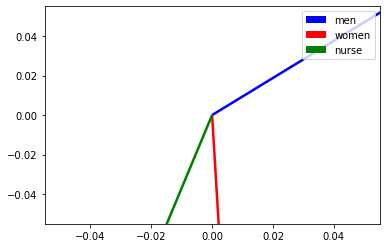

In [104]:
plot_vector(mat[word_to_ix['goo']],'b','men')
plot_vector(mat[word_to_ix['women']],'r','women')
#plot_vector(mat[word_to_ix['queen']],'g','queen')
plot_vector(mat[word_to_ix['nurse']],'g','nurse')